[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mortgad/DLVR/blob/main/Project.ipynb)

# Another dataset but without ethnicity
https://www.kaggle.com/datasets/chiragsaipanuganti/morph/data

In [74]:
# Get libraries for loading data and plotting subgroups

import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np


In [67]:
# Connecting to google drive to retrieve the data
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [68]:
# Get the data
df = pd.read_csv("/content/gdrive/MyDrive/Visual reg/age_gender.csv", sep= ',')

In [4]:
# Inspect data to understand it and the underlying distribution of the variables.

print(df.shape) # (23705, 5)

df.head() # We only have five columns. The age, gender, ethinicity, img_name and pixels.



(23705, 5)


,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [69]:
# As the img_name have no relevance for predictions, it is deleted.
df = df.drop("img_name", axis = 1)

In [70]:
# Looking at simple descriptive statistic, which may only be releveant for the numeric collumn age
df.describe()

# We see that there are age from 1 - 116. It could be discussed whehter pictures of babies are needed to build this model.
# I should maybe also discuss whether 116 is an outlier.

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


<Axes: xlabel='ethnicity', ylabel='count'>

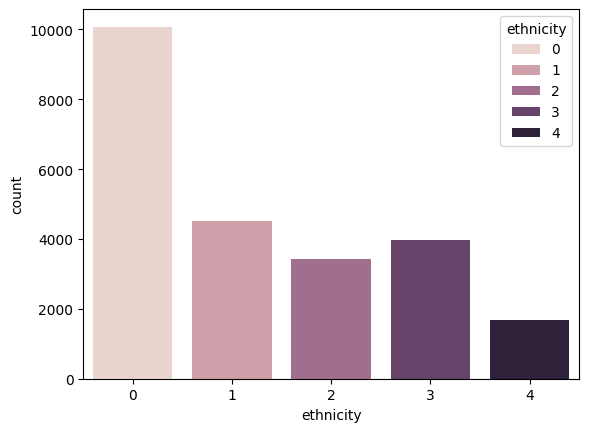

In [7]:
# Look at the categorical variables.

# First Ethnicity
sns.countplot(data=df, x ='ethnicity', hue ='ethnicity')

<Axes: xlabel='gender', ylabel='count'>

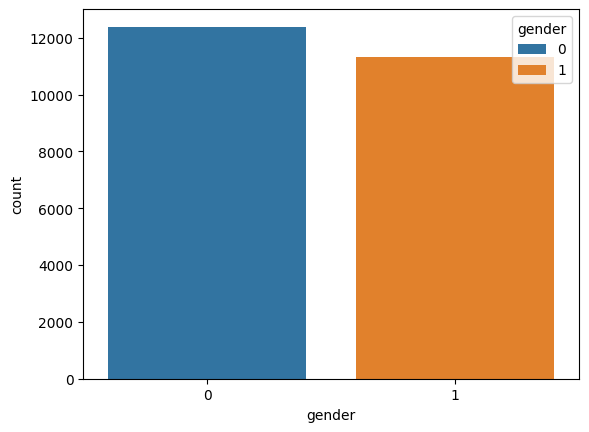

In [8]:
# Then gender.
sns.countplot(data=df, x ='gender', hue ='gender')

<Axes: xlabel='age', ylabel='Density'>

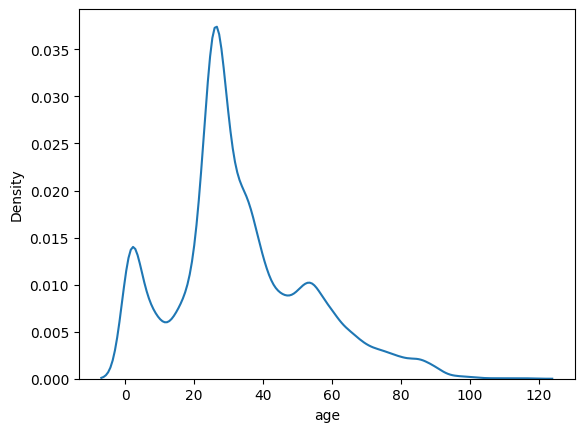

In [9]:
# Plot of the age for all observations:
sns.kdeplot(data=df, x='age')

# It may be a bit problematic, there is only a few of the observations which is around the threshold
# between 15-20 which is where we will have our cut off.

<Axes: xlabel='age', ylabel='Density'>

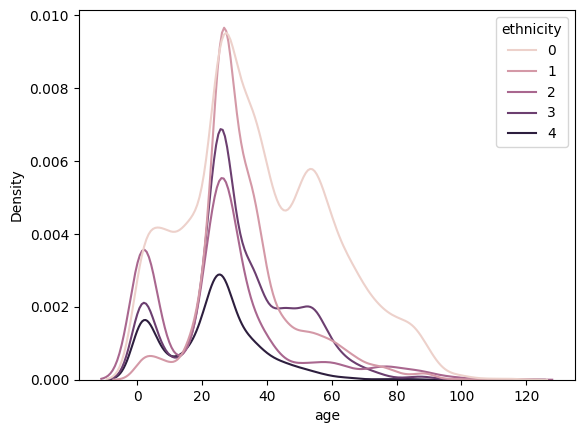

In [ ]:
# Plot age for the etnicity to tell if it is the same acroos all etnicities
sns.kdeplot(data=df, x='age', hue='ethnicity')

# We see that the distribution of age throughout the classes are almost the same with the exeption
# of 0 which have more peoepl between 15-20 as well as 60-65

In [71]:
## Reshaping our pixel as it is currently just given as a long string
# We use the .split() as the pixels are seperated by space.

# Find the total pixels, as the number length of pixels.
total_pixels = len(df['pixels'][0].split(" "))

# Find the height and width as the square root of the total pixels.
# We use int() to get a whole number
img_height = int(np.sqrt(total_pixels))
img_width = int(np.sqrt(total_pixels))

# display the size of the image.
print(total_pixels, img_height, img_width)

# Should we maybe discuss that picture is quite small.. ?
# There is no color channels.


2304 48 48


In [72]:
# Reshape the data into an image for all data.

x = pd.Series(df["pixels"])  # Turn into a series, so that we can easily apply transformations.
x = x.apply(lambda x: x.split(' '))  # Split the pixels, where there is space.
x = x.apply(lambda x: np.array(list(map(lambda z: int(z), x))))  # Turn string into an integer
x = np.array(x)  # Convert the series back to an array - so that we can reshape it.
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48,1))  # Reshape into image format)

# reshape data
print("x shape: ",x.shape)



x shape:  (23705, 48, 48, 1)


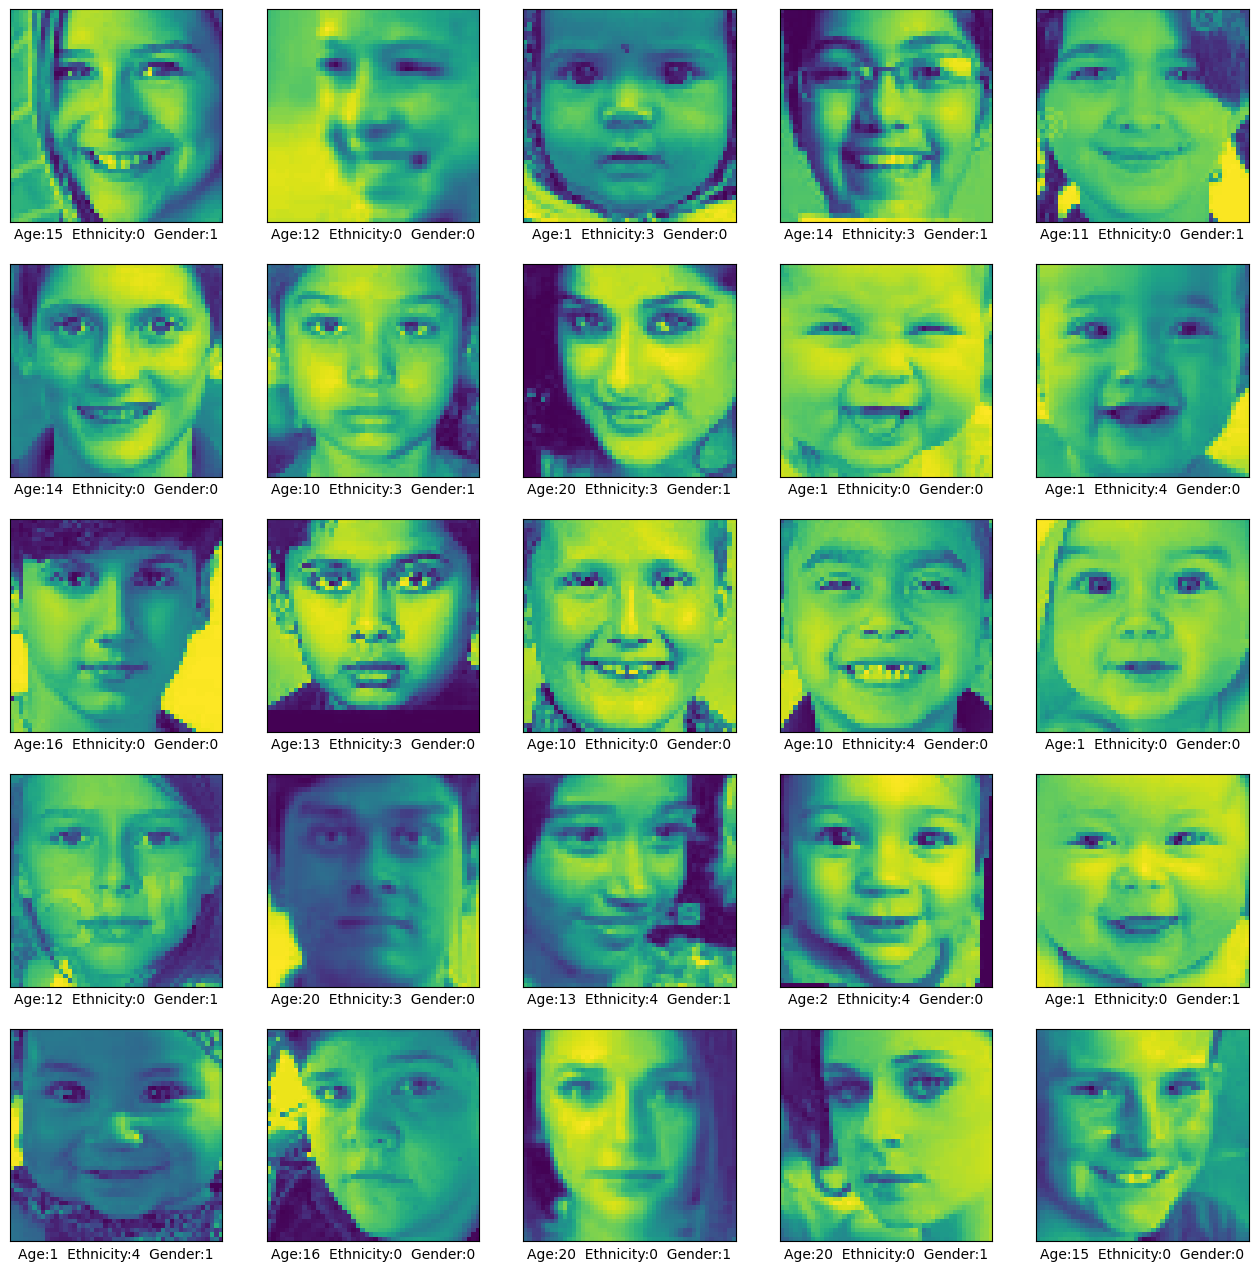

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the DataFrame df with image arrays in the column 'image_array'
plt.figure(figsize=(16, 16))

# Generate 25 random indices for image selection
for i,a in zip(np.random.randint(0, 3434, 25),range(1,26)):
    plt.subplot(5,5,a)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i])
    plt.xlabel(
        "Age:"+str(df['age'].iloc[i])+
        "  Ethnicity:"+str(df['ethnicity'].iloc[i])+
        "  Gender:"+ str(df['gender'].iloc[i])
    )
plt.show()

<ipython-input-79-875faa2cb418>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x="Is18", data=df, palette="icefire")


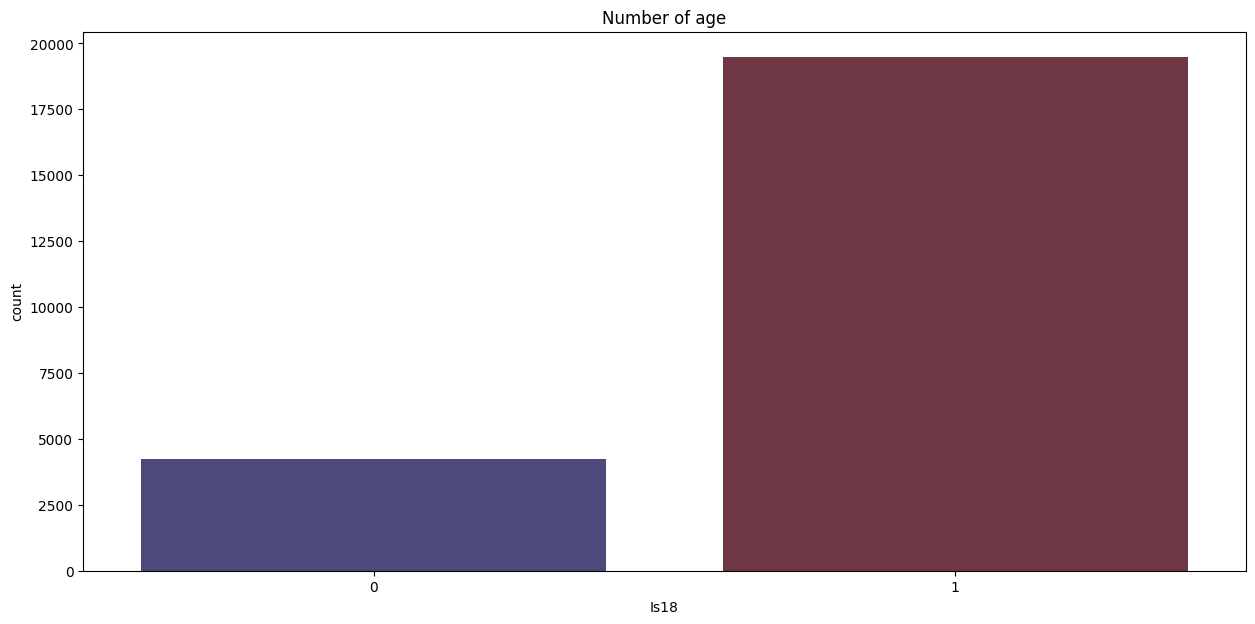

In [79]:
# Then i want the data to have a extra collumn which is whether or not the person
# is above or below 18 years of age.

df["Is18"] = df["age"].apply(lambda x: 0 if x <= 17 else 1)

# Plot the distribution of age
plt.figure(figsize=(15,7))
g = sns.countplot(x="Is18", data=df, palette="icefire")
plt.title("Number of age")
plt.show()

# Looking at the plot below it is clear that we have way more data of people above 18 compared to below.

In [88]:
# As for now we will not make any data augmentation as this will be an intervention later on.

# Therefore we start by normalizing the image_array and then split into train and test.

# Normalizing.
x = x / 255.0

# Turning the data indicator for age into a categorical variable
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
#Is18_matrix = np.array(df["Is18"])
#Is18 = to_categorical(Is18_matrix, num_classes = 2)


# More bins:
df["age_group"] = pd.cut(df["age"],bins=[0,3,18,45,64,116],labels=["0","1","2","3","4"])
plt.figure(figsize=(15,7))
#g = sns.countplot(df["age_group"], palette="icefire")
#plt.title("Number of age")

age_matrix = np.array(df["age_group"])
age = to_categorical(age_matrix, num_classes = 5)

# Split into train and test using Sk.Learn
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, age, test_size= 0.3)


<Figure size 1500x700 with 0 Axes>

In [ ]:
X_train.shape

(16593, 48, 48, 1)

In [77]:
# Getting to modelling

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [93]:
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5, activation='softmax')  # Two outputs, one for each class
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),  # Use categorical crossentropy for one-hot encoded labels
              metrics=['accuracy'])

## Stop training when validation loss reach 0.2700
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      pass

callback = myCallback()


model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 428,933 (1.64 MB)

 Trainable params: 428,869 (1.64 MB)

 Non-trainable params: 64 (256.00 B)

In [56]:
import tensorflow as tf
from tensorflow.keras import layers as L

# Updated model for regression (age prediction)
model = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu'),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1)  # Single output for age prediction
])

# Compile the model for regression
model.compile(optimizer='sgd',
              loss='mean_squared_error',  # Use MSE for regression
              metrics=['mean_absolute_error'])  # Track MAE (Mean Absolute Error)

## Stop training callback remains unchanged
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        pass

callback = myCallback()

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 46, 46, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 428,673 (1.64 MB)

 Trainable params: 428,609 (1.64 MB)

 Non-trainable params: 64 (256.00 B)

In [94]:
# Fit model an display loss¨

history = model.fit(
    X_train, y_train, epochs=30, validation_split=0.1, batch_size=64, callbacks=[callback])

Epoch 1/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5498 - loss: 1.6050 - val_accuracy: 0.5904 - val_loss: 1.5904
Epoch 2/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5654 - loss: 1.5871 - val_accuracy: 0.5904 - val_loss: 1.5716
Epoch 3/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5724 - loss: 1.5690 - val_accuracy: 0.5904 - val_loss: 1.5523
Epoch 4/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5682 - loss: 1.5506 - val_accuracy: 0.5904 - val_loss: 1.5319
Epoch 5/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5726 - loss: 1.5298 - val_accuracy: 0.5904 - val_loss: 1.5101
Epoch 6/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5709 - loss: 1.5108 - val_accuracy: 0.5904 - val_loss: 1.4869
Epoch 7/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5708 - loss: 1.4880 - val_accuracy: 0.5904 - val_loss: 1.4618
Epoch 8/30
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5662 - loss: 1.4682 - val_accuracy: 0

KeyboardInterrupt: 

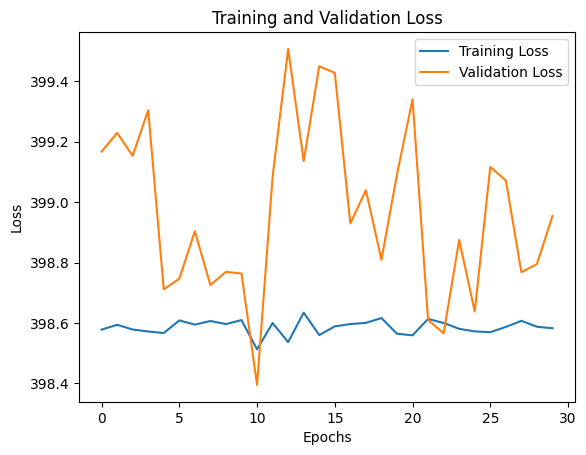

In [48]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


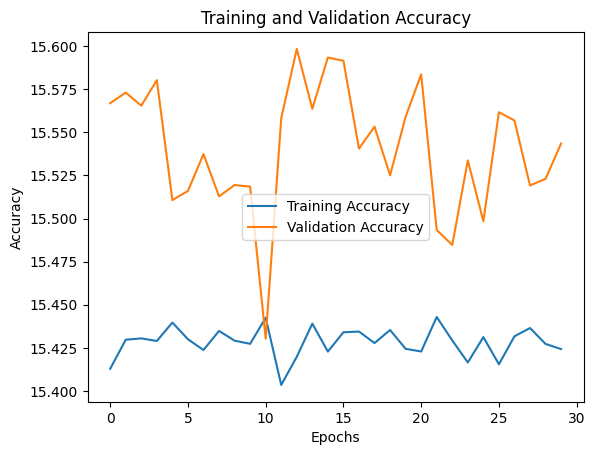

In [51]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['mean_absolute_error'], label='Training Accuracy')
plt.plot(history.history['val_mean_absolute_error'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
